Signal 1 length: 9
Signal 2 length: 12
Normalized Signal 2 length: 9

Displaying plots...


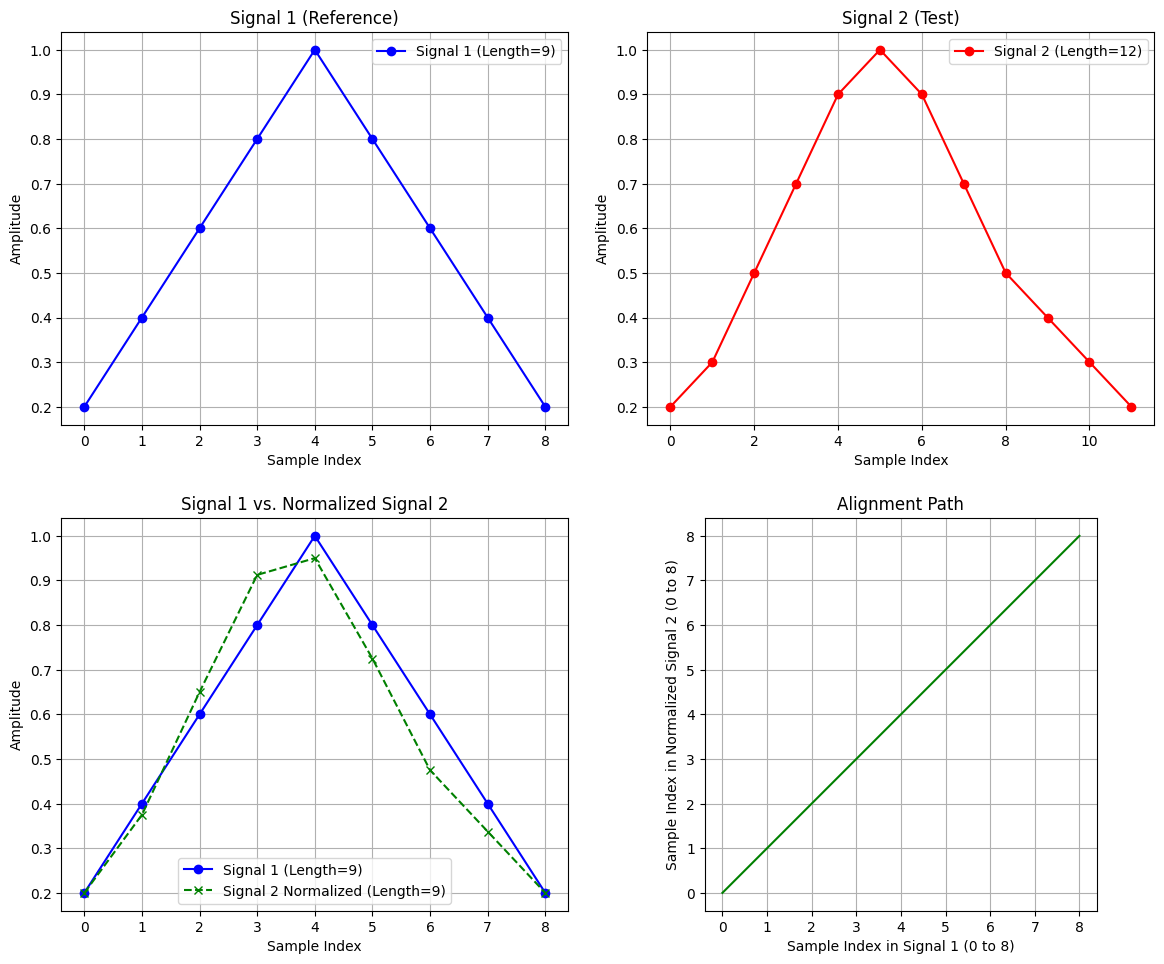


--- Inference ---

Linear Time Normalization adjusts the time axis of the slower signal (Signal 2)
so that both signals have equal lengths. This is achieved by resampling
(in this case, linear interpolation) the longer signal to match the
length of the shorter reference signal.

As seen in the "Signal 1 vs. Normalized Signal 2" plot, this method
enables a direct comparison and alignment of the two signals.
The "Alignment Path" plot shows a perfect 1-to-1 linear correspondence,
which is the direct result of this normalization. This method ensures
that similar parts of the speech waveform align in time,
despite differences in speaking speed.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

def perform_ltn_analysis():
    """
    Performs Linear Time Normalization (LTN) on two sample signals
    and generates the required plots and inference.
    """
    
    # --- Given Data ---
    signal1 = np.array([0.2, 0.4, 0.6, 0.8, 1.0, 0.8, 0.6, 0.4, 0.2])
    signal2 = np.array([0.2, 0.3, 0.5, 0.7, 0.9, 1.0, 0.9, 0.7, 0.5, 0.4, 0.3, 0.2])
    
    len1 = len(signal1)
    len2 = len(signal2)
    
    print(f"Signal 1 length: {len1}")
    print(f"Signal 2 length: {len2}")

    # --- Task 1: Plot both speech signals ---
    plt.figure(figsize=(12, 10))
    
    # Plot for Signal 1
    plt.subplot(2, 2, 1)
    plt.plot(signal1, 'bo-', label=f'Signal 1 (Length={len1})')
    plt.title('Signal 1 (Reference)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    # Plot for Signal 2
    plt.subplot(2, 2, 2)
    plt.plot(signal2, 'ro-', label=f'Signal 2 (Length={len2})')
    plt.title('Signal 2 (Test)')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    
    # --- Task 2: Perform Linear Time Normalization on Signal 2 ---
    # We will resample Signal 2 to have the same length as Signal 1.
    # This is done using linear interpolation.
    
    # Create the original x-axis for signal 2 (0 to len2-1)
    x2_original = np.linspace(0, len2 - 1, num=len2)
    
    # Create the new x-axis we want to interpolate onto (0 to len2-1, but with len1 points)
    # Note: We scale the new axis to the *range* of the old one for np.interp
    x2_new = np.linspace(0, len2 - 1, num=len1)
    
    # Perform linear interpolation
    signal2_normalized = np.interp(x2_new, x2_original, signal2)
    
    print(f"Normalized Signal 2 length: {len(signal2_normalized)}")

    # --- Task 3: Compute and Plot Alignment (Signals) ---
    # Now that both signals have length len1, we can plot them together.
    
    plt.subplot(2, 2, 3)
    plt.plot(signal1, 'bo-', label=f'Signal 1 (Length={len1})')
    plt.plot(signal2_normalized, 'gx--', label=f'Signal 2 Normalized (Length={len1})')
    plt.title('Signal 1 vs. Normalized Signal 2')
    plt.xlabel('Sample Index')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)

    # --- Task 4: Plot the alignment path ---
    # Since LTN forces a 1:1 correspondence after normalization,
    # the alignment path is a simple diagonal line.
    
    alignment_path = np.arange(len1)
    
    plt.subplot(2, 2, 4)
    plt.plot(alignment_path, alignment_path, 'g-')
    plt.title('Alignment Path')
    plt.xlabel(f'Sample Index in Signal 1 (0 to {len1-1})')
    plt.ylabel(f'Sample Index in Normalized Signal 2 (0 to {len1-1})')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)

    plt.tight_layout(pad=2.0)
    print("\nDisplaying plots...")
    plt.show()

    # --- Task 5: Write an inference ---
    
    inference = """
--- Inference ---

Linear Time Normalization adjusts the time axis of the slower signal (Signal 2)
so that both signals have equal lengths. This is achieved by resampling
(in this case, linear interpolation) the longer signal to match the
length of the shorter reference signal.

As seen in the "Signal 1 vs. Normalized Signal 2" plot, this method
enables a direct comparison and alignment of the two signals.
The "Alignment Path" plot shows a perfect 1-to-1 linear correspondence,
which is the direct result of this normalization. This method ensures
that similar parts of the speech waveform align in time,
despite differences in speaking speed.
"""
    
    print(inference)


if __name__ == '__main__':
    perform_ltn_analysis()